In [1]:
## -------------------------------------------------------------------------
## REFERENCE NOTES for HOW WE MIGHT IMPORT FROM A QISKIT ADDON PACKAGE
## -------------------------------------------------------------------------
# Delete this section, once we have our package built and released,
# or as we finalize this tutorial, or possibly delete this tutorial
#
# We could `import` similarly as is done for the sqd addon
# from qiskit_addon_sqd.counts import generate_counts_uniform
# from qiskit_addon_sqd.counts import counts_to_arrays

# Thus, an `import` for our QCBM package might look like:
# from qiskit_addon_qcbm.x import qcbm

# or possibly like this, where we make fcns visible in the outermost __init__.py:
#
# from qiskit_addon_qcbm import (
#    fcn_1_create_QCBM,
#    fcn_2_create_QCBM_Experiment,
#    fcn_3_run_QCBM_Experiment,
#    fcn_4_post_process_QCBM_Experiment_Results,
#)

# Repos for existing qiskit addons (not a comprehensive list):
# https://github.com/Qiskit/qiskit-addon-sqd
# https://github.com/Qiskit/qiskit-addon-cutting

# Code Usage Examples, for qiskit_addon_sqd and qiskit_addon_cutting
# https://quantum.cloud.ibm.com/docs/en/guides/qiskit-addons-sqd-get-started
# https://quantum.cloud.ibm.com/docs/en/guides/qiskit-addons-cutting-gates


In [2]:
# -----------------------------------------------------------------------
# UPDATE THE SYSTEM PATH in order to find our qiskit_addon_qcbm package
# -----------------------------------------------------------------------
# While the qiskit_addon_qcbm package is being developed, 
# we need to add the local root directory of the Qiskit-QCBMs repo to our system path,
# when we import from a Jupyter Notebook not in that directory,
# so that the qiskit_addon_qcbm module can be found
# This directory is something like:
# C:\\Users\<username>\repos\Qiskit-QCBMs

# ----------------------------------------------------------------------
# NOTE: THIS ONLY NEEDS TO BE DONE ONCE
#-----------------------------------------------------------------------
import os, sys

# This assumes that this tutorial is located somewhere in the Qiskit-QCBMs repo dir, at least locally
current_dir = os.getcwd()
qcbm_pkg_dir = current_dir.split("\\docs\\tutorials")[0]

if qcbm_pkg_dir not in sys.path:
    sys.path.append(qcbm_pkg_dir)

print(qcbm_pkg_dir)
print()
print(sys.path)
print()
print(len(sys.path))
print()

C:\Users\nat\repos\Qiskit-QCBMs

['C:\\Users\\nat\\miniconda3\\envs\\qamp25\\python312.zip', 'C:\\Users\\nat\\miniconda3\\envs\\qamp25\\DLLs', 'C:\\Users\\nat\\miniconda3\\envs\\qamp25\\Lib', 'C:\\Users\\nat\\miniconda3\\envs\\qamp25', '', 'C:\\Users\\nat\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\nat\\miniconda3\\envs\\qamp25\\Lib\\site-packages', 'C:\\Users\\nat\\repos\\Qiskit-QCBMs']

8



In [3]:
# -------------------------------------------------------------------
# IMPORT the qiskit_addon_qcbm package
# -------------------------------------------------------------------
from qiskit_addon_qcbm.born_machine import QCBM
from qiskit_addon_qcbm.datasets import MixtureGaussianData as mgd
import matplotlib.pyplot as plt
import numpy as np

data type: <class 'numpy.ndarray'>


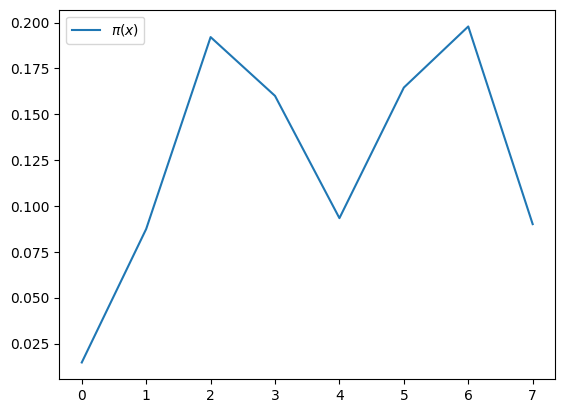

In [4]:
n_qubits = 3
x_max = 2**n_qubits
x_input = np.arange(x_max)
mus = [(2 / 7) * x_max, (5 / 7) * x_max]
sigmas = [x_max / 8] * 2
data = mgd.mixture_gaussian_pdf(x_input, mus, sigmas)
print("data type:", type(data))

plt.plot(data, label=r"$\pi(x)$")
plt.legend()
plt.show()

In [5]:
qcbm = QCBM(num_qubits=n_qubits, num_layers=1, data=data)
qcbm.print()

The QCBM has: 
              3 qubits,
              1 layers,
              12 parameters,
              depth of 7, and
              data of length 8.


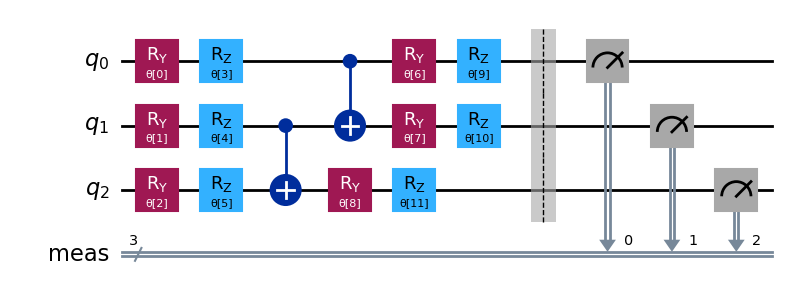

In [6]:
qcbm.draw()

In [7]:
print(type(data), len(data))

<class 'numpy.ndarray'> 8


sum of counts: 24
num shots: 24


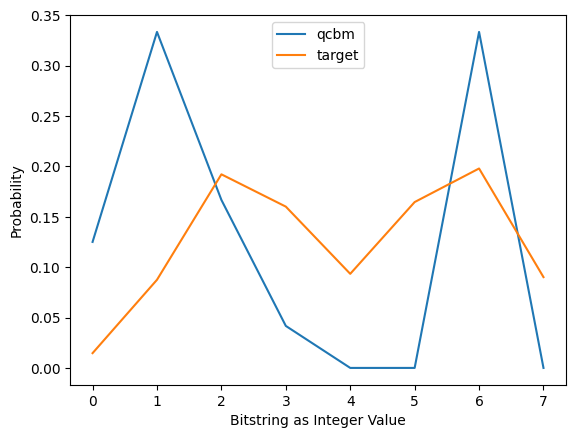

Iters. done: 0 [Current cost: 0.07496958189185012]


C:\Users\nat\miniconda3\envs\qamp25\Lib\site-packages\scipy\_lib\pyprima\common\preproc.py:68: UserWarning: COBYLA: Invalid MAXFUN; it should be at least num_vars + 2; it is set to 14
  warn(f'{solver}: Invalid MAXFUN; it should be at least {min_maxfun_str}; it is set to {maxfun}')


Iters. done: 1 [Current cost: 0.09618142913635097]
Iters. done: 2 [Current cost: 0.05889958971310486]
Iters. done: 3 [Current cost: 0.05482365451768362]
Iters. done: 4 [Current cost: 0.057396035124745205]
Iters. done: 5 [Current cost: 0.041539283371914995]
Iters. done: 6 [Current cost: 0.03578533843532104]
Iters. done: 7 [Current cost: 0.0847392894924827]
Iters. done: 8 [Current cost: 0.06791706419722779]
Iters. done: 9 [Current cost: 0.09708100181622971]
Iters. done: 10 [Current cost: 0.02965585677610158]
Iters. done: 11 [Current cost: 0.016895623247161554]
Iters. done: 12 [Current cost: 0.05144332887435161]
Iters. done: 13 [Current cost: 0.030960247393137953]


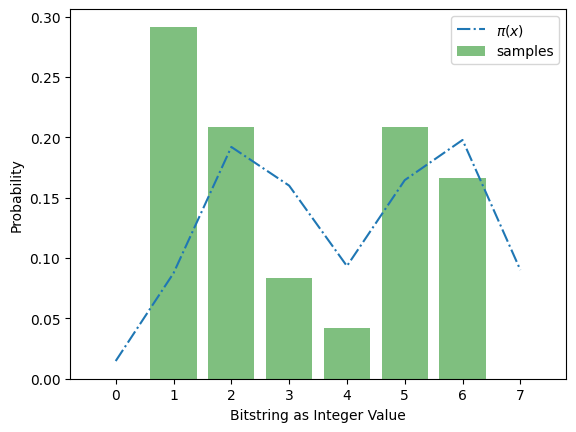

{'divergence': [],
 'iterations': 14,
 'loss': [np.float64(0.07496958189185012),
  np.float64(0.09618142913635097),
  np.float64(0.05889958971310486),
  np.float64(0.05482365451768362),
  np.float64(0.057396035124745205),
  np.float64(0.041539283371914995),
  np.float64(0.03578533843532104),
  np.float64(0.0847392894924827),
  np.float64(0.06791706419722779),
  np.float64(0.09708100181622971),
  np.float64(0.02965585677610158),
  np.float64(0.016895623247161554),
  np.float64(0.05144332887435161),
  np.float64(0.030960247393137953)],
 'num_shots': 24,
 'prev_params': array([4.30489245, 6.35403407, 4.2296134 , 5.78266569, 1.79449234,
        6.18522428, 1.58087008, 1.66849787, 3.32776036, 3.40242295,
        3.4504981 , 1.21984671]),
 'counts_dict': {'010': 5, '011': 2, '110': 4, '001': 7, '101': 5, '100': 1}}

In [8]:
qcbm.train(data=data, loss_fcn=None, num_iterations=5, num_shots=24)

In [9]:
d = {'a': 300, 'b': 444, 'c':144}
sum(d.values())

888